In [38]:
import numpy as np
import scipy as sp
import pandas as pd
import torch
import seaborn as sns
import autoviz as av

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


Import Data

In [203]:
train = pd.read_csv(r"C:\Users\yangs\Documents\Python Projects\Nonapus\store-sales-time-series-forecasting\train.csv")
test = pd.read_csv(r"C:\Users\yangs\Documents\Python Projects\Nonapus\store-sales-time-series-forecasting\test.csv")
trans = pd.read_csv(r"C:\Users\yangs\Documents\Python Projects\Nonapus\store-sales-time-series-forecasting\transactions.csv")
store = pd.read_csv(r"C:\Users\yangs\Documents\Python Projects\Nonapus\store-sales-time-series-forecasting\stores.csv")
oil = pd.read_csv(r"C:\Users\yangs\Documents\Python Projects\Nonapus\store-sales-time-series-forecasting\oil.csv")
offday = pd.read_csv(r"C:\Users\yangs\Documents\Python Projects\Nonapus\store-sales-time-series-forecasting\holidays_events.csv")


Rename Columns

In [206]:
store = store.rename(columns = {"type": "store_type"})
offday = offday.rename(columns = {"type": "day_type"})
oil = oil.rename(columns = {"dcoilwtico": "oil_price"})
offday_2018 = pd.DataFrame({"date": ["2018-08-24"], "day_type": ["Holiday"], "locale": ["Local"], "locale_name": ["Ambato"], "description": ["Fundacion de Ambato"], "transferred": [False]})
offday = pd.concat([offday, offday_2018]).reset_index()

Merge all data sets, then correct typing, and transform skewed variables

In [225]:
def merge_all(T, trans = trans, store = store, oil= oil, offday = offday):
    
    T = pd.merge(T, trans, how = "left", on = ["date", "store_nbr"])
    T = pd.merge(T, store, how = "left", on = "store_nbr")
    T = pd.merge(T, oil, how = "left", on = "date")

    return(T)


def standardize(T):
    
    T["log_promo"] = np.log(1 + T["onpromotion"])
    T["store_nbr"] = T["store_nbr"].astype("object")
    T["cluster"] = T["cluster"].astype("object")
    
    T = T.drop(columns = ["id", "onpromotion"])
    return(T)

Create the training set and testing set

In [226]:
Tr = standardize(merge_all(train))
Tr["log_sales"] = np.log(Tr["sales"] + 1)
Tr = Tr.drop(columns = "sales")

Te = standardize(merge_all(test))

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...

################ Regression problem #####################
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
date,object,0.000000,1,,,No issue
store_nbr,object,0.000000,0,,,No issue
family,object,0.000000,0,,,No issue
transactions,float64,8.208667,NA,5.000000,8359.000000,"12313 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 7521 outliers greater than upper bound (3637.50) or lower than lower bound(-510.50). Cap them or remove them."
city,object,0.000000,0,,,No issue
state,object,0.000000,0,,,No issue
store_type,object,0.000000,0,,,No issue
cluster,object,0.000000,0,,,No issue
oil_price,float64,31.072000,NA,26.190000,110.620000,"46608 missing values. Impute them with mean, median, mode, or a constant value such as 123."
log_promo,float64,0.000000,NA,0.000000,6.579251,Column has 30396 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.


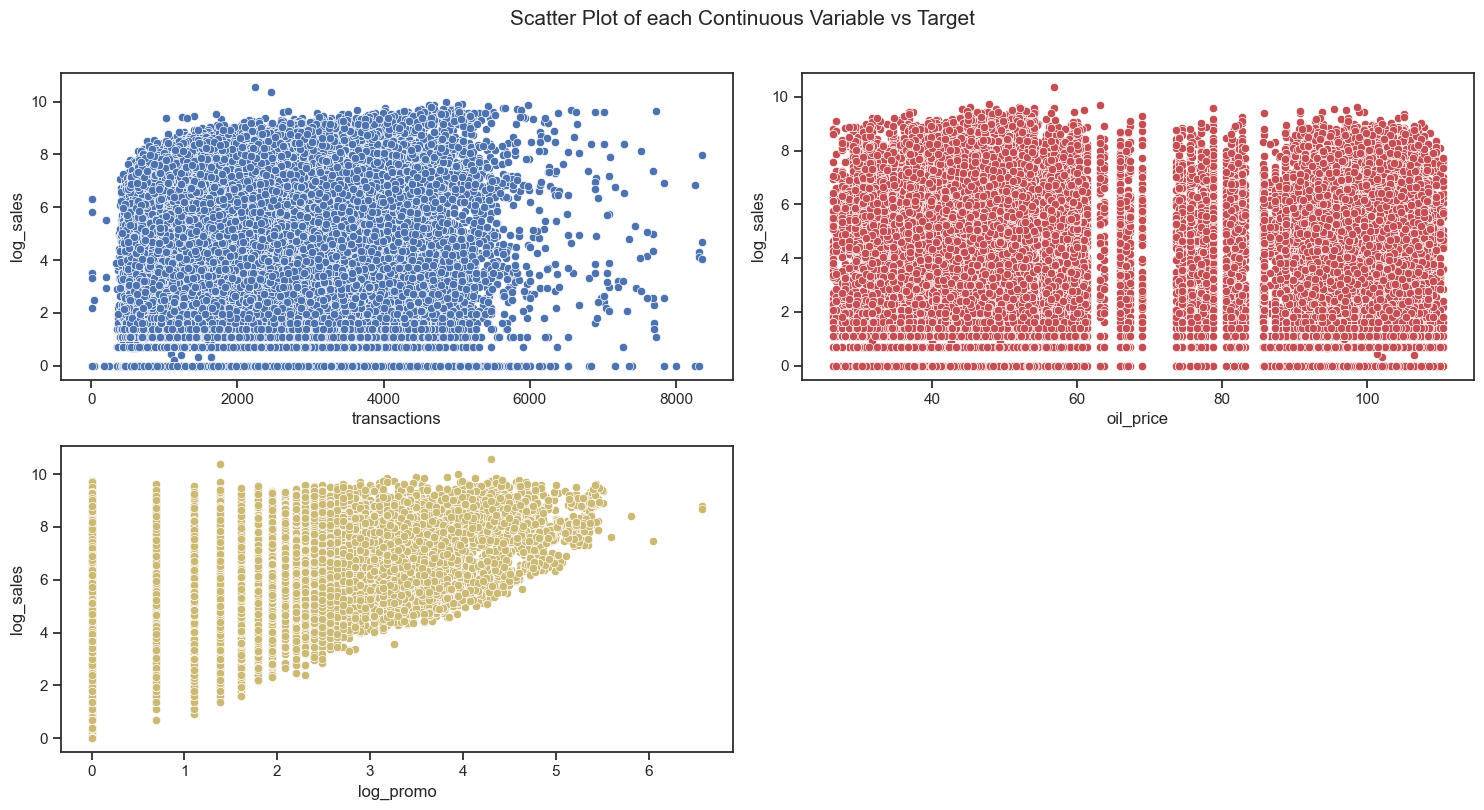

Number of All Scatter Plots = 6


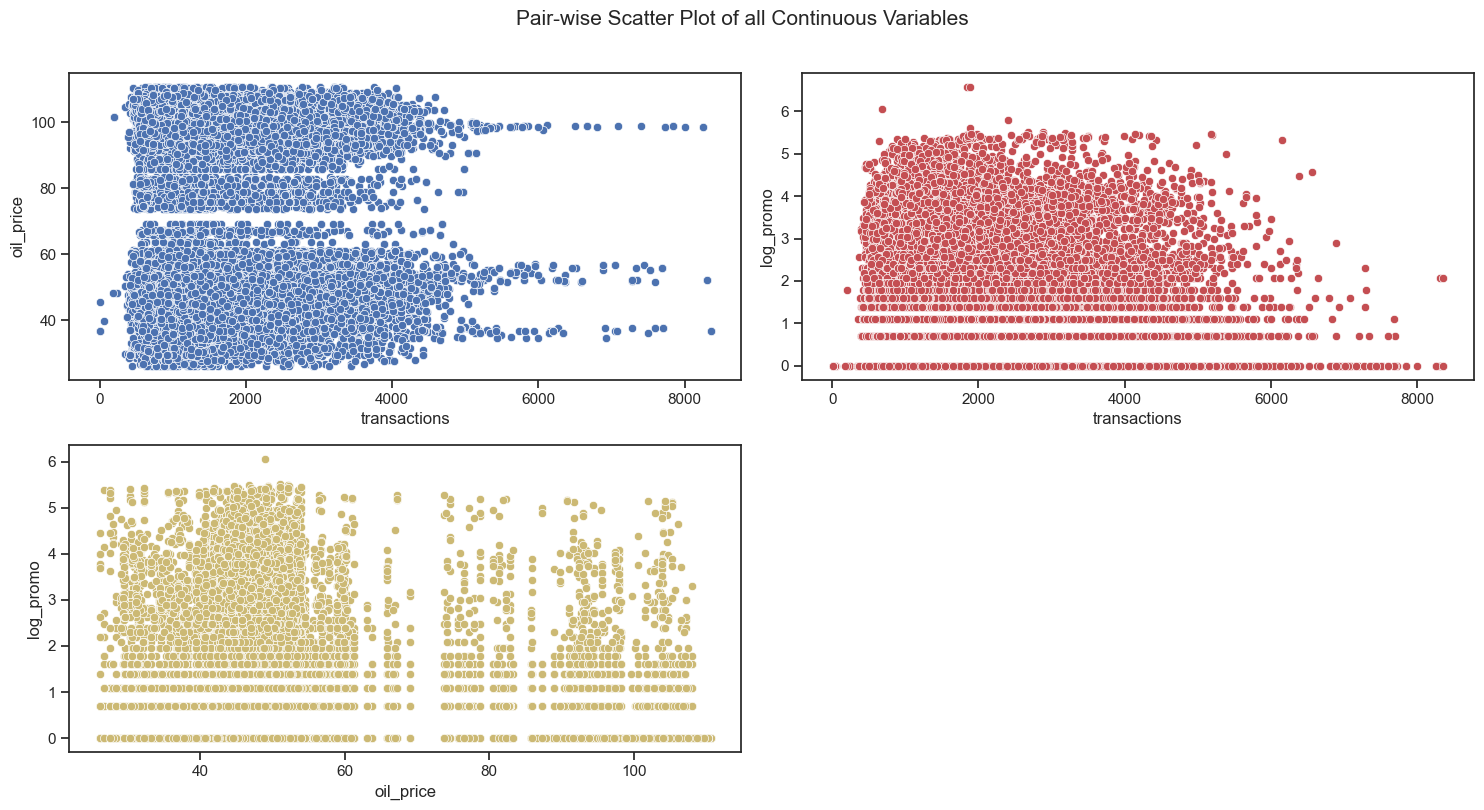

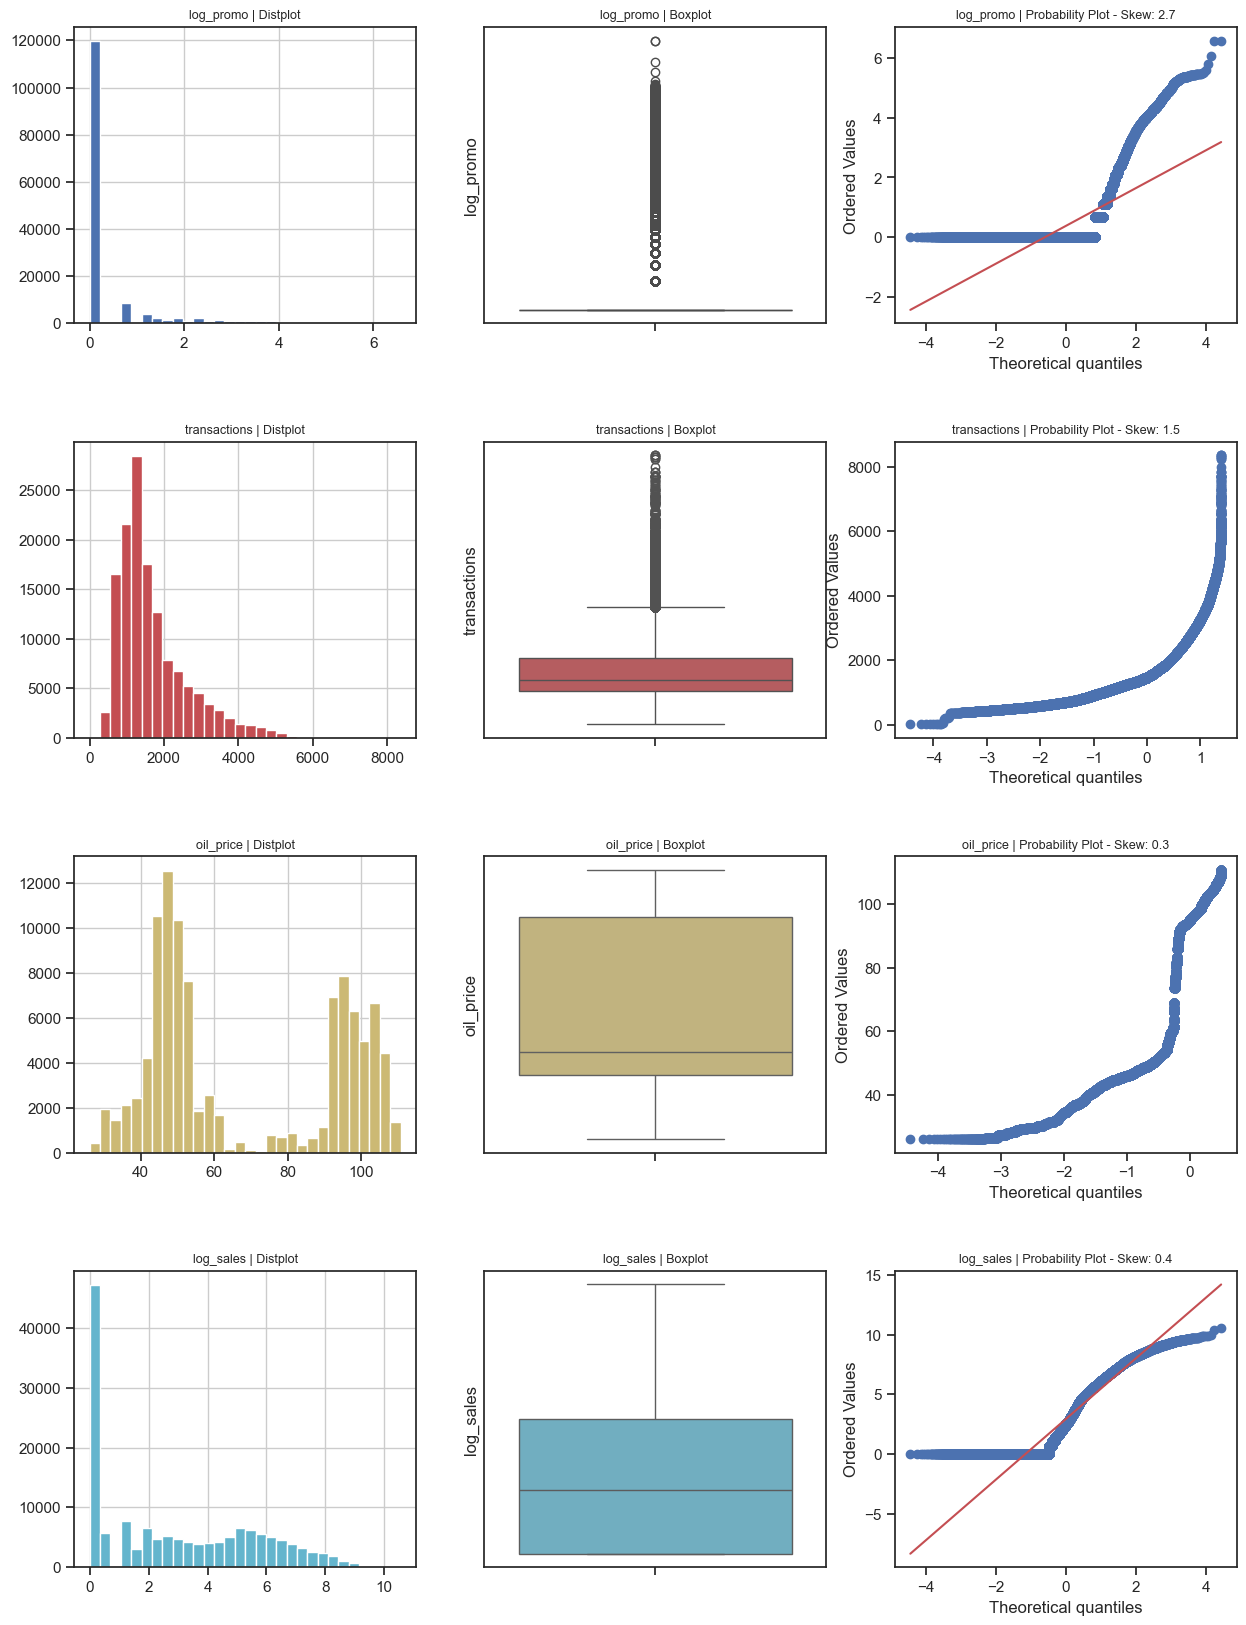

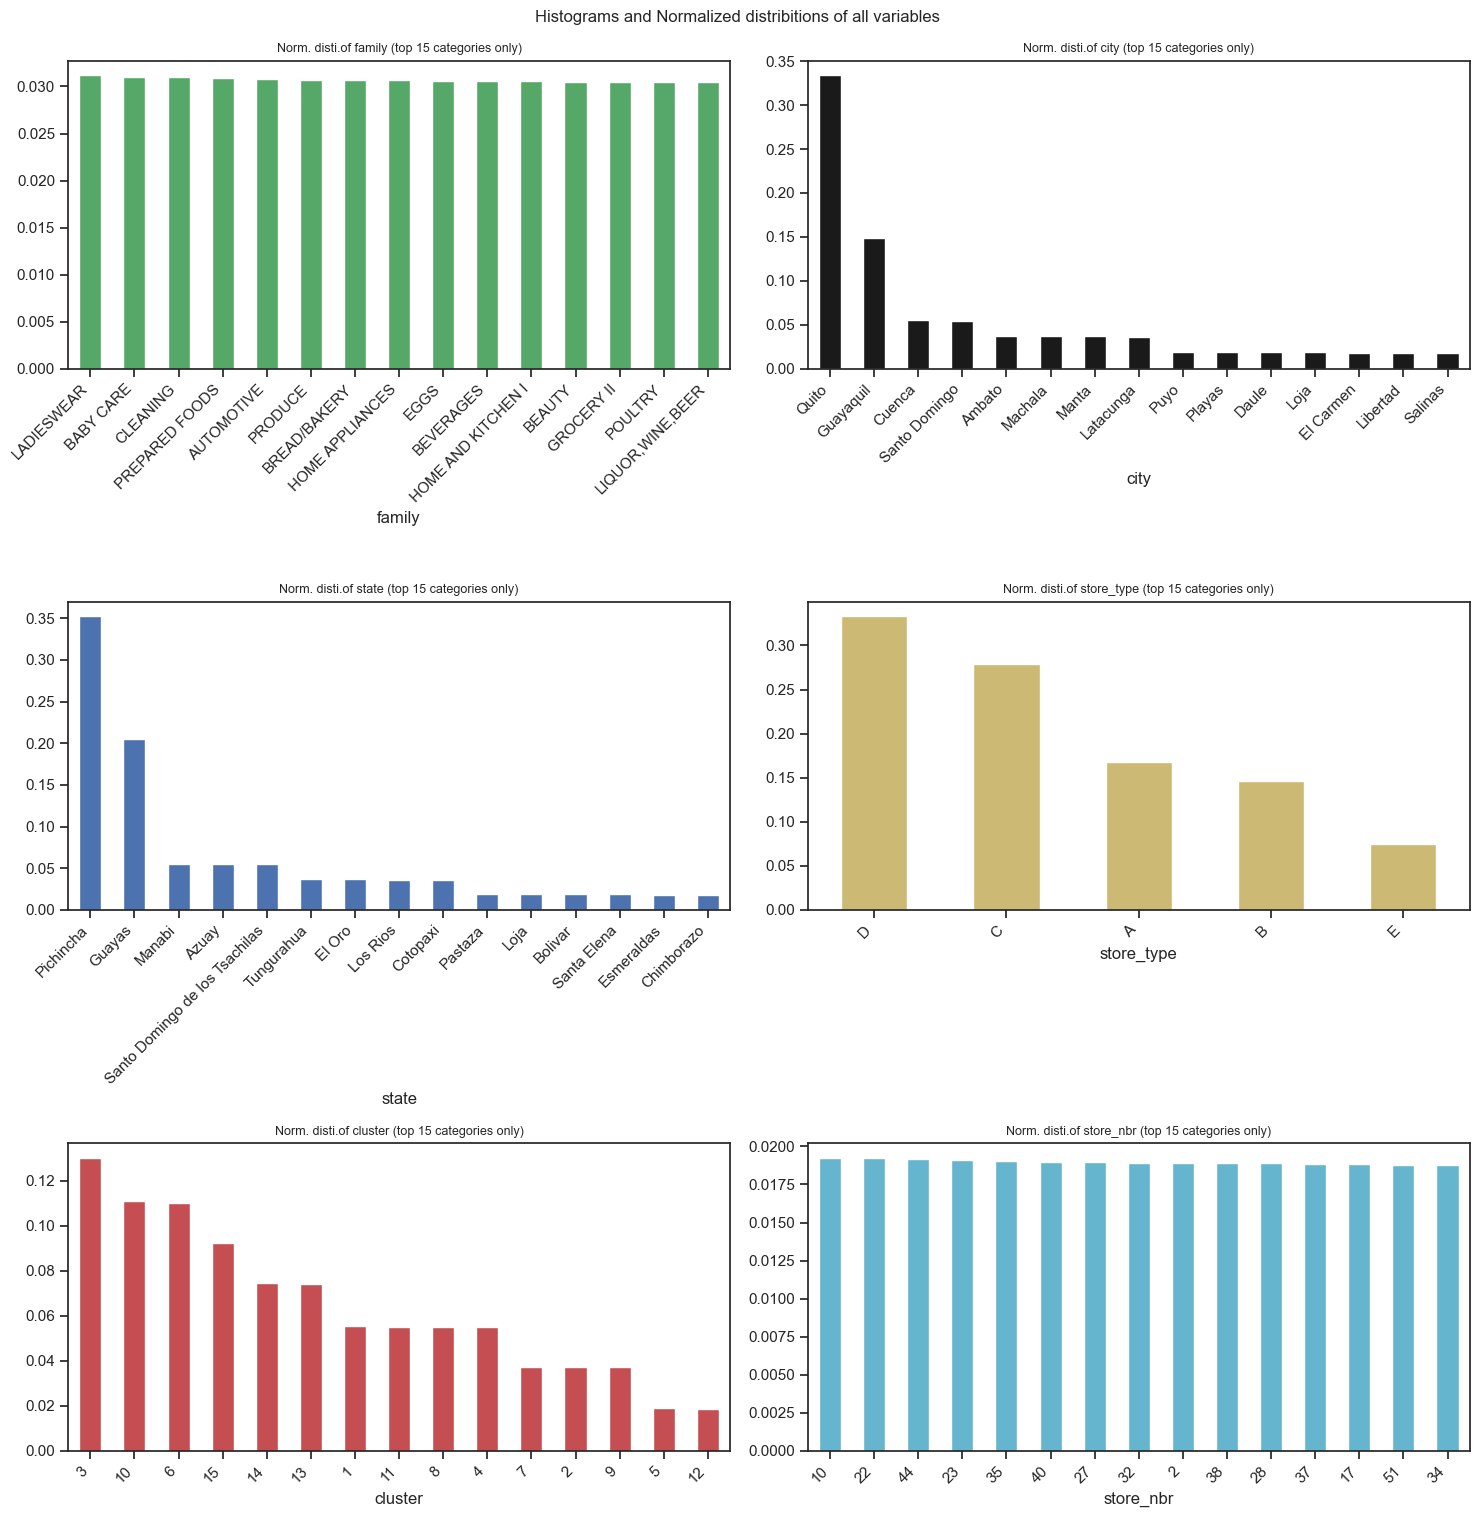

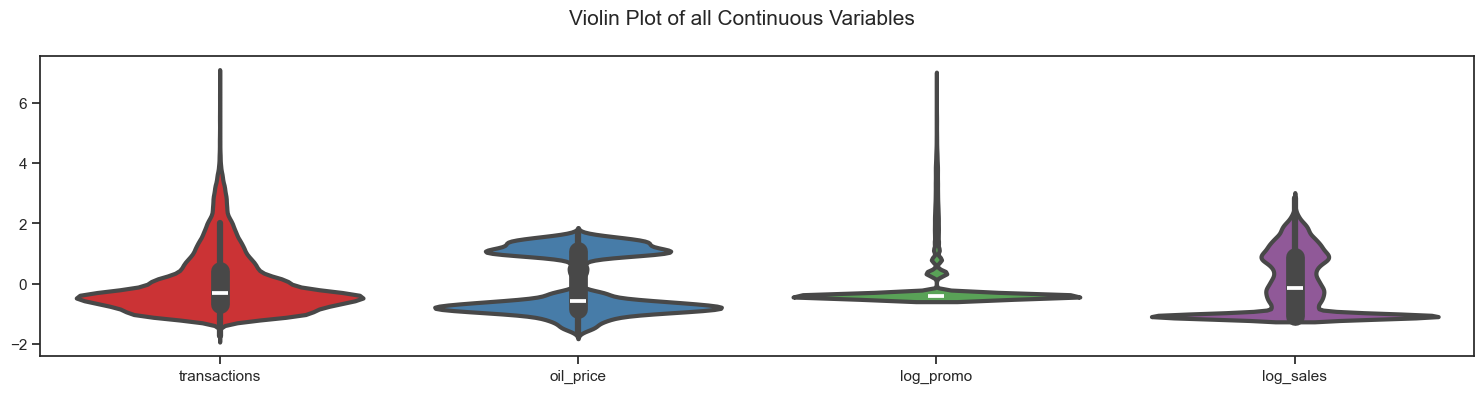

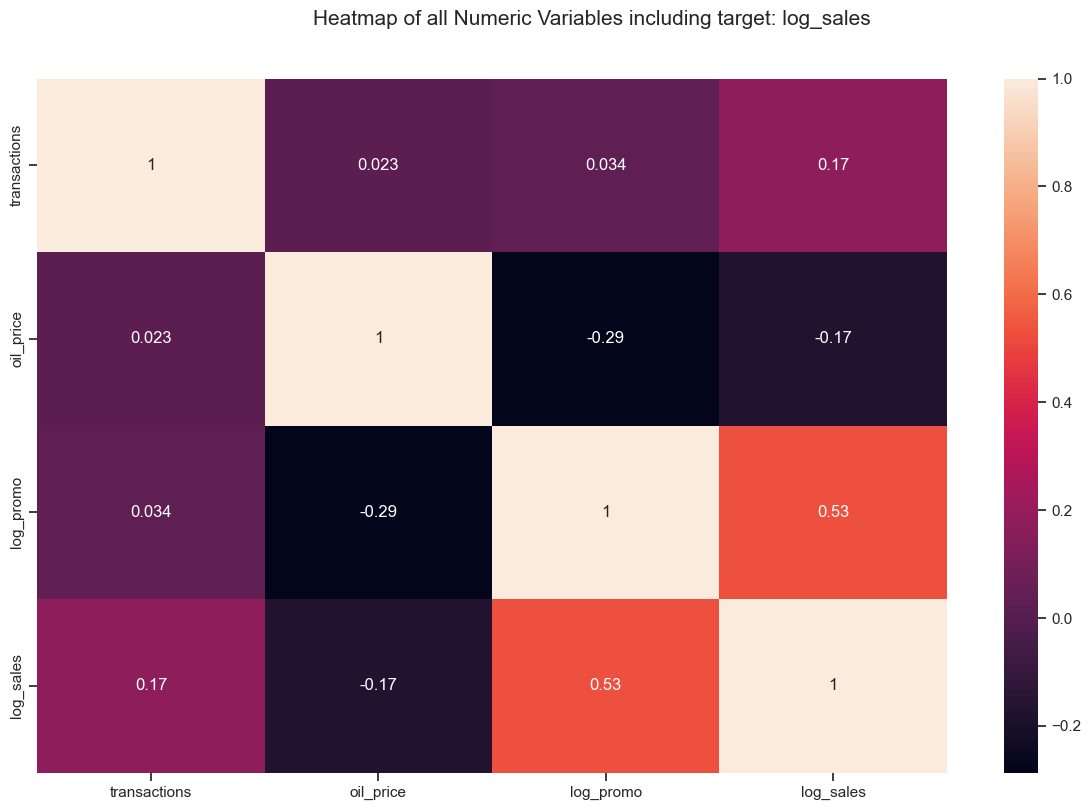

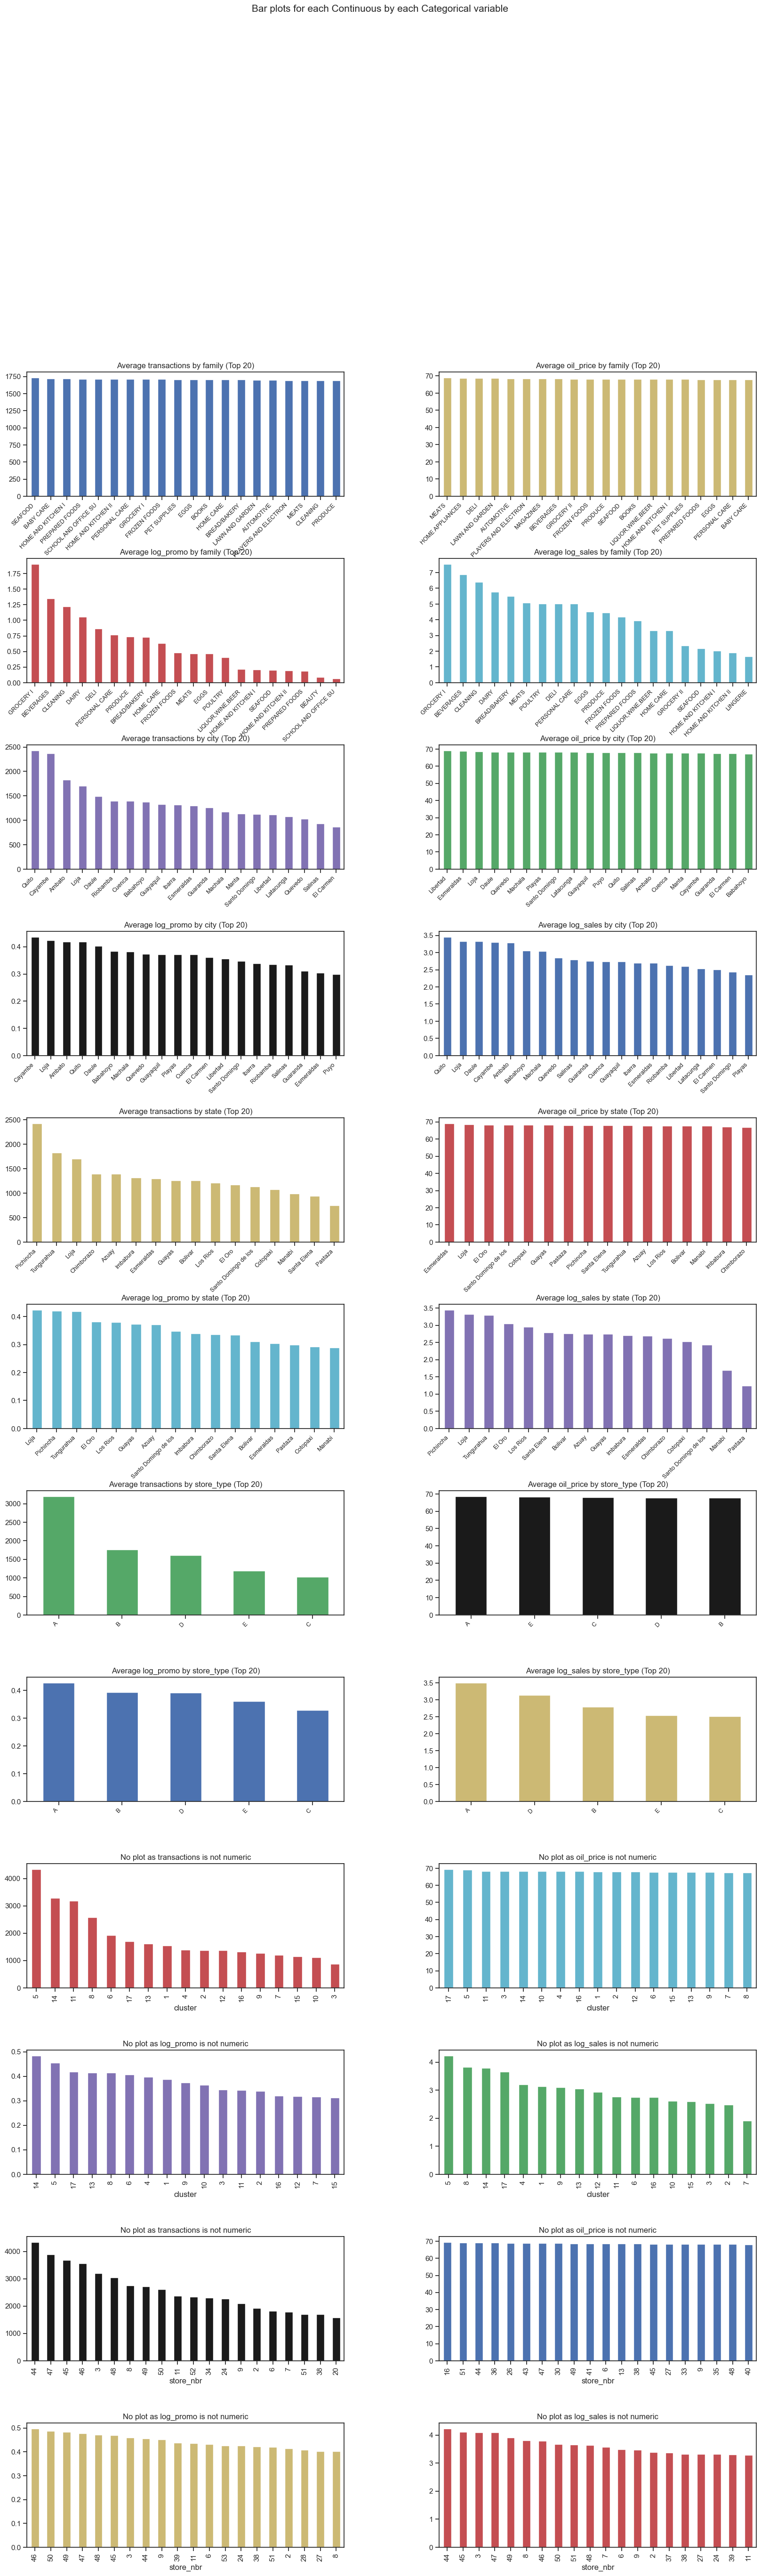

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\yangs\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\yangs\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\yangs\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\yangs\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\yangs\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

Could not draw wordcloud plot for date. We need at least 1 word to plot a word cloud, got 0.
All Plots done
Time to run AutoViz = 25 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


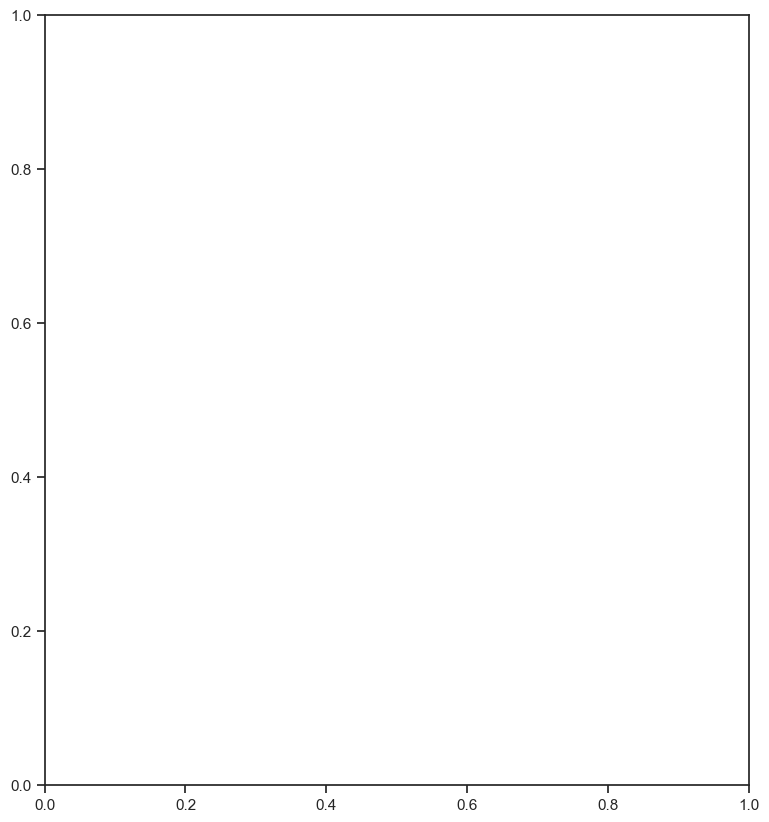

In [228]:
AV = av.AutoViz_Class()


target_variable = "your_target_variable"

dft = AV.AutoViz(
    Tr,
    sep=",",
    depVar="log_sales",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

In [49]:
vis

,id,date,store_nbr,family,sales,onpromotion
666116,666116,2014-01-10,49,FROZEN FOODS,314.00,0
489383,489383,2013-10-02,4,PET SUPPLIES,0.00,0
1889738,1889738,2015-11-29,31,PET SUPPLIES,2.00,0
2629601,2629601,2017-01-19,40,PREPARED FOODS,47.00,2
1689038,1689038,2015-08-08,5,SEAFOOD,11.04,0
...,...,...,...,...,...,...
832781,832781,2014-04-14,25,PET SUPPLIES,0.00,0
2846418,2846418,2017-05-21,25,BEVERAGES,2086.00,28
1555795,1555795,2015-05-26,12,EGGS,0.00,0
1933119,1933119,2015-12-23,49,GROCERY I,11680.00,11


In [37]:
offday[offday["type"] == "Transfer"]

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


In [35]:
offday[offday["type"] == "Bridge"]

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


In [19]:
train["date"].max()

'2017-08-15'

In [23]:
train[(train["store_nbr"] == 53) & (train["date"] == "2017-08-15")]

,id,date,store_nbr,family,sales,onpromotion
3000690,3000690,2017-08-15,53,AUTOMOTIVE,9.000,0
3000691,3000691,2017-08-15,53,BABY CARE,0.000,0
3000692,3000692,2017-08-15,53,BEAUTY,7.000,1
3000693,3000693,2017-08-15,53,BEVERAGES,1646.000,9
3000694,3000694,2017-08-15,53,BOOKS,0.000,0
3000695,3000695,2017-08-15,53,BREAD/BAKERY,380.199,10
3000696,3000696,2017-08-15,53,CELEBRATION,4.000,0
3000697,3000697,2017-08-15,53,CLEANING,706.000,11
3000698,3000698,2017-08-15,53,DAIRY,431.000,18
3000699,3000699,2017-08-15,53,DELI,186.868,9
